# Ford GoBike Data Analysis

#### by Chloe Xue &nbsp; &nbsp; July, 2019


## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<br>
<li><a href="#wrangling">Preliminary Wrangling</a></li>
    <ul>
        <li><a href="#gather">Part I. Gathering Data</a></li>
        <li><a href="#access">Part II. Accessing Data</a></li>
            <ul>
                <li><a href="#quality">Data Quality</a></li>
            </ul>
        <li><a href="#clean">Part III. Cleaning Data</a></li>
        <li><a href="#store">Part IV. Storing Data</a></li>
    </ul>
<br>
<li><a href="#eda">Exploratory Data Analysis</a></li>
    <ul>
        <li><a href="#uni">Part V. Univariate Exploration</a></li>
        <li><a href="#bi">Part VI. Bivariate Exploration</a></li>
        <li><a href="#multi">Part VII. Multivariate Exploration</a></li>
    </ul>
<br>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> This document explores a dataset containing information about individual rides made in a bike-sharing system covering the greater San Francisco Bay Area trips from May 2018 to May 2019. 

<a id='wrangling'></a>
## Preliminary Wrangling

In [1]:
# Import all packages and set plots to be embedded inline.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import os 
import glob
import math

%matplotlib inline

<a id='gather'></a>
### Gathering Data

In [2]:
# path = '/~/GoBikeData'
# all_filenames = glob.glob(os.path.join(path,"*.csv"))
# #combine all files in the list
# combined_csv = pd.concat([pd.read_csv(f) for f in all_filenames])
# # export to csv
# combined_csv.to_csv('master_data.csv',index = False, encoding = 'utf-8-sig')

In [3]:
# Load the dataset.
df = pd.read_csv('master_data.csv')

<a id='access'></a>
### Accessing Data

In [4]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,79489,2018-11-30 13:40:32.7690,2018-12-01 11:45:21.9720,NaN,NaN,37.420000,-121.940000,NaN,NaN,37.410000,-121.940000,4105,Customer,1982.0,Female,No
1,42847,2018-11-30 20:13:45.5090,2018-12-01 08:07:53.1330,37.0,2nd St at Folsom St,37.785000,-122.395936,30.0,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,2614,Customer,1992.0,Male,No
2,1128,2018-11-30 23:58:26.4310,2018-12-01 00:17:14.4880,249.0,Russell St at College Ave,37.858473,-122.253253,249.0,Russell St at College Ave,37.858473,-122.253253,1496,Subscriber,1998.0,Male,Yes
3,2476,2018-11-30 23:35:06.7230,2018-12-01 00:16:23.4740,104.0,4th St at 16th St,37.767045,-122.390833,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,1334,Subscriber,1959.0,Male,No
4,1273,2018-11-30 23:54:12.3890,2018-12-01 00:15:26.3680,44.0,Civic Center/UN Plaza BART Station (Market St ...,37.781074,-122.411738,60.0,8th St at Ringold St,37.774520,-122.409449,393,Subscriber,1993.0,Female,Yes


In [5]:
df.info(verbose = True, null_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2472717 entries, 0 to 2472716
Data columns (total 16 columns):
duration_sec               2472717 non-null int64
start_time                 2472717 non-null object
end_time                   2472717 non-null object
start_station_id           2460201 non-null float64
start_station_name         2460201 non-null object
start_station_latitude     2472717 non-null float64
start_station_longitude    2472717 non-null float64
end_station_id             2460201 non-null float64
end_station_name           2460201 non-null object
end_station_latitude       2472717 non-null float64
end_station_longitude      2472717 non-null float64
bike_id                    2472717 non-null int64
user_type                  2472717 non-null object
member_birth_year          2346967 non-null float64
member_gender              2347176 non-null object
bike_share_for_all_trip    2472717 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 301.8+ MB


In [6]:
df.duplicated().sum()

0

In [7]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,2.472717e+06,2.460201e+06,2.472717e+06,2.472717e+06,2.460201e+06,2.472717e+06,2.472717e+06,2.472717e+06,2.346967e+06
mean,8.205459e+02,1.294894e+02,3.776832e+01,-1.223507e+02,1.280782e+02,3.776819e+01,-1.223494e+02,3.016866e+03,1.984013e+03
std,2.128288e+03,1.079210e+02,1.064946e-01,1.729208e-01,1.079565e+02,1.453476e-01,3.642813e-01,1.797237e+03,1.024875e+01
min,6.100000e+01,3.000000e+00,0.000000e+00,-1.224737e+02,3.000000e+00,0.000000e+00,-1.224737e+02,1.100000e+01,1.878000e+03
25%,3.450000e+02,4.100000e+01,3.777041e+01,-1.224117e+02,3.600000e+01,3.777106e+01,-1.224113e+02,1.535000e+03,1.979000e+03
50%,5.510000e+02,9.300000e+01,3.778101e+01,-1.223974e+02,9.300000e+01,3.778107e+01,-1.223971e+02,2.933000e+03,1.986000e+03
75%,8.640000e+02,2.020000e+02,3.779728e+01,-1.222887e+02,2.000000e+02,3.779728e+01,-1.222894e+02,4.407000e+03,1.991000e+03
max,8.628100e+04,4.270000e+02,4.551000e+01,0.000000e+00,4.270000e+02,4.551000e+01,0.000000e+00,7.196000e+03,2.001000e+03


<a id='quality'></a>
#### Quality


- duration_sec needs to convert to minutes.
- member_birth_year needs to convert into age.
- latitute and longitute can be convert into distance.
- incorrect data in member_birth_year such that minimum is 1878. 
- datatype of start_station_id, end_station_id and bike_id should be object.
- datatype of member_gender, user_type and bike_share_for_all_trip should be category.
- datatype of start_time and end_time should be timestamp.
- create columns for start_time to seperate year, month, day, hour.
- drop unuseful columns.

<a id='clean'></a>
### Cleaning Data

In [8]:
df_clean = df.copy()

#### Data conversions

In [9]:
# Convert duration to minutes.
df_clean['duration_sec'] = df_clean['duration_sec']/60
df_clean.rename(columns = {'duration_sec':'duration'},inplace = True)

In [10]:
# Convert member_birth_year to age.
df_clean['age'] = 2019 - df_clean['member_birth_year']

In [11]:
def distance(origin, destination):
    lat1, lon1 = origin
    lat2, lon2 = destination
    radius = 6373 # km

    dlat = math.radians(lat2-lat1)
    dlon = math.radians(lon2-lon1)
    a = math.sin(dlat/2) * math.sin(dlat/2) + math.cos(math.radians(lat1)) \
        * math.cos(math.radians(lat2)) * math.sin(dlon/2) * math.sin(dlon/2)
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
    d = radius * c

    return d

In [12]:
# Create a column 'distance' and compute distance in miles.
df_clean['distance_miles'] = df_clean.apply(lambda x: 
                          distance((x['start_station_latitude'], x['start_station_longitude']),
                                   (x['end_station_latitude'], x['end_station_longitude'])), axis=1)*0.621371

#### Data type corrections

In [13]:
df_clean.info(verbose = True, null_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2472717 entries, 0 to 2472716
Data columns (total 18 columns):
duration                   2472717 non-null float64
start_time                 2472717 non-null object
end_time                   2472717 non-null object
start_station_id           2460201 non-null float64
start_station_name         2460201 non-null object
start_station_latitude     2472717 non-null float64
start_station_longitude    2472717 non-null float64
end_station_id             2460201 non-null float64
end_station_name           2460201 non-null object
end_station_latitude       2472717 non-null float64
end_station_longitude      2472717 non-null float64
bike_id                    2472717 non-null int64
user_type                  2472717 non-null object
member_birth_year          2346967 non-null float64
member_gender              2347176 non-null object
bike_share_for_all_trip    2472717 non-null object
age                        2346967 non-null float64
distance_mil

In [14]:
# Change start_station_id, end_station_id, bike_id to object.
df_clean['start_station_id'] = df_clean['start_station_id'].astype(str).replace('\.0', '', regex=True)
df_clean['end_station_id'] = df_clean['end_station_id'].astype(str).replace('\.0', '', regex=True)
df_clean['bike_id'] = df_clean['bike_id'].astype(str)

In [15]:
# Change member_gender, user_type and bike_share_for_all_trip to category.
df_clean['member_gender'] = df_clean['member_gender'].astype('category')
df_clean['user_type'] = df_clean['user_type'].astype('category')
df_clean['bike_share_for_all_trip'] = df_clean['bike_share_for_all_trip'].astype('category')

In [16]:
# Change age to int.
df_clean['age'] = df_clean['age'].round().astype('Int64')

In [17]:
# Change start_time and end_time to timestamps.
df_clean['start_time'] = pd.to_datetime(df_clean['start_time'])
df_clean['end_time'] = pd.to_datetime(df_clean['end_time'])

#### Create columns to split start_time

In [18]:
# Split start_time to year, year_month, month, date, day and hour.
df_clean['start_time_year'] = df_clean['start_time'].dt.year.astype(int)
df_clean['start_time_year_month'] = df_clean['start_time'].map(lambda x: x.strftime('%Y-%m'))
df_clean['start_time_month'] = df_clean['start_time'].dt.month_name()
df_clean['start_time_date'] = df_clean['start_time'].dt.date
df_clean['start_time_day'] = df_clean['start_time'].dt.day_name()
df_clean['start_time_hour'] = df_clean['start_time'].dt.hour.astype(int)

In [19]:
# Then I find out I need to revise the age. Age depends on the year when user renting the bike.
df_clean['age'] = (df_clean['start_time_year'] - df_clean['member_birth_year']).fillna(0).astype(int).replace('\.0', '', regex=True)

In [20]:
# Drop columns that will not be used.
df_clean.drop(columns=['start_station_latitude', 'start_station_longitude',
                       'end_station_latitude','end_station_longitude',
                       'member_birth_year'],inplace = True)

In [21]:
# Check the final table.
df_clean.sample(10)

,duration,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_gender,bike_share_for_all_trip,age,distance_miles,start_time_year,start_time_year_month,start_time_month,start_time_date,start_time_day,start_time_hour
546190,10.333333,2018-09-04 13:07:21.791,2018-09-04 13:17:42.290,76,McCoppin St at Valencia St,321,5th St at Folsom,3954,Subscriber,Male,No,22,1.208908,2018,2018-09,September,2018-09-04,Tuesday,13
241374,6.783333,2019-04-13 21:11:25.692,2019-04-13 21:18:13.270,258,University Ave at Oxford St,266,Parker St at Fulton St,3077,Subscriber,Male,No,38,0.689566,2019,2019-04,April,2019-04-13,Saturday,21
1036704,11.816667,2018-05-27 19:26:05.477,2018-05-27 19:37:54.659,26,1st St at Folsom St,41,Golden Gate Ave at Polk St,4221,Subscriber,Male,No,30,1.394155,2018,2018-05,May,2018-05-27,Sunday,19
1728441,7.033333,2018-07-26 17:38:32.185,2018-07-26 17:45:34.339,77,11th St at Natoma St,109,17th St at Valencia St,3454,Subscriber,Male,No,30,0.773791,2018,2018-07,July,2018-07-26,Thursday,17
1608137,17.183333,2019-01-18 08:01:09.485,2019-01-18 08:18:20.767,166,College Ave at Alcatraz Ave,257,Fifth St at Delaware St,4874,Subscriber,Female,No,30,2.889688,2019,2019-01,January,2019-01-18,Friday,8
1817918,3.050000,2018-07-13 13:22:34.245,2018-07-13 13:25:38.093,197,El Embarcadero at Grand Ave,194,Lakeshore Ave at Trestle Glen Rd,1559,Subscriber,Male,No,25,0.382633,2018,2018-07,July,2018-07-13,Friday,13
1448979,10.133333,2019-05-09 14:08:30.622,2019-05-09 14:18:38.748,357,2nd St at Julian St,286,San Carlos St at 11th St,630,Subscriber,Male,Yes,24,0.948403,2019,2019-05,May,2019-05-09,Thursday,14
194922,8.183333,2019-04-21 21:21:23.967,2019-04-21 21:29:35.471,255,Virginia St at Shattuck Ave,243,Bancroft Way at College Ave,3526,Subscriber,Male,No,24,0.967117,2019,2019-04,April,2019-04-21,Sunday,21
1141372,6.350000,2018-05-09 15:04:03.563,2018-05-09 15:10:24.871,243,Bancroft Way at College Ave,246,Berkeley Civic Center,502,Subscriber,Male,Yes,21,0.885136,2018,2018-05,May,2018-05-09,Wednesday,15
1480648,20.250000,2019-05-04 12:14:01.013,2019-05-04 12:34:16.334,55,Webster St at Grove St,70,Central Ave at Fell St,791,Customer,Male,No,28,0.845448,2019,2019-05,May,2019-05-04,Saturday,12


<a id='store'></a>
### Storing Data

In [22]:
# Store dataframe into csv.
df_clean.to_csv('gobike_explore.csv',encoding = 'utf-8', index = False)

In [23]:
df = pd.read_csv('gobike_explore.csv')

### What is the structure of your dataset?

> There are 2,472,717 trips in the GoBike dataset with 10 features (duration, start/end time, start/end location, start/end id, distance of ride, bike id, user type, member gender, member age and bike share for all program). Among 10 features, 3 variables are numeric, 1 variable is datatime, 3 variables are object and 3 variables are category type.

> - duration: Trip duration is in minutes.
- start/end time: Two original columns are timestamp. I split start time into year/month/day/hour for furture specifications.
- distance: Trip distance is in miles.
- start/end locations: id and station name.
- user: gender, age and type. There are two types of user: customer and subscriber.


### What is/are the main feature(s) of interest in your dataset?

> In order to figure out what causes higher demand and most bike usage, I'm most interested in finding out user preferences and behaviors in renting the bikes in following perspectives: group of ages, time of the day, day of week, type of users and station popularity. 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I expect that start time will have the strongest effect on demand. I also think the location and certain user group will have effects on bike usage and demand.

<a id='eda'></a>
## Exploratory Data Analysis

## Question 1. How does GoBike grow in past 12 months?

<a id='uni'></a>
### Univariate Exploration

In [24]:
# Set visualization themes.
color = "Blues"
sb.set_style("whitegrid")

In [25]:
# Convert start_time_day into ordered categorical types.
day_of_week = {'start_time_day':['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']}
for day in day_of_week:
    ordered_day = pd.api.types.CategoricalDtype(ordered = True,categories = day_of_week[day])
    df[day] = df[day].astype(ordered_day)

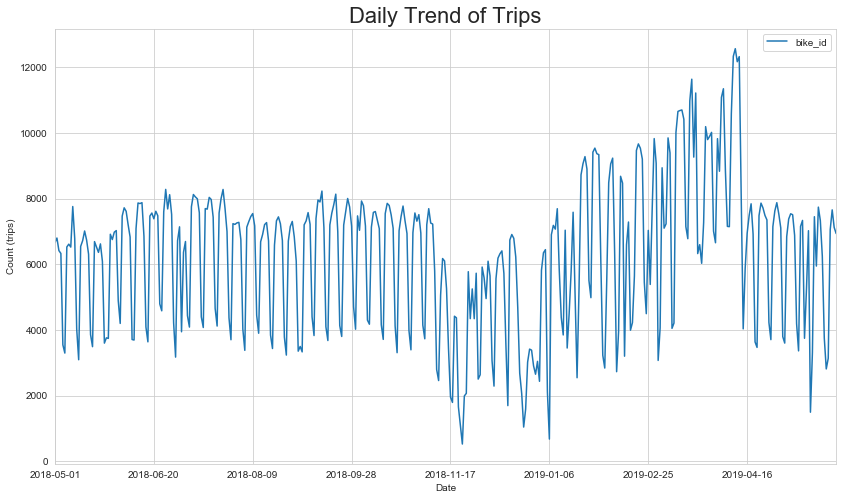

In [26]:
# Plot daily trend of trips.
df.groupby('start_time_date').agg({'bike_id':'count'}).plot(kind='line',figsize = (14,8))
plt.title('Daily Trend of Trips', fontsize = 22)
plt.xlabel('Date')
plt.ylabel('Count (trips)')
plt.show()

The overall count of trips tend to be steady in numbers except there are huge dropdown in December 2018 and January 2019. The recent peak happens on April 2019. Numbers are dropping in May and fluctuate sharply on a weekly basis. 

## Question 2. What are the timely trends? Who are the major user group?

I'll start by looking at the trend of trips in different time scope.

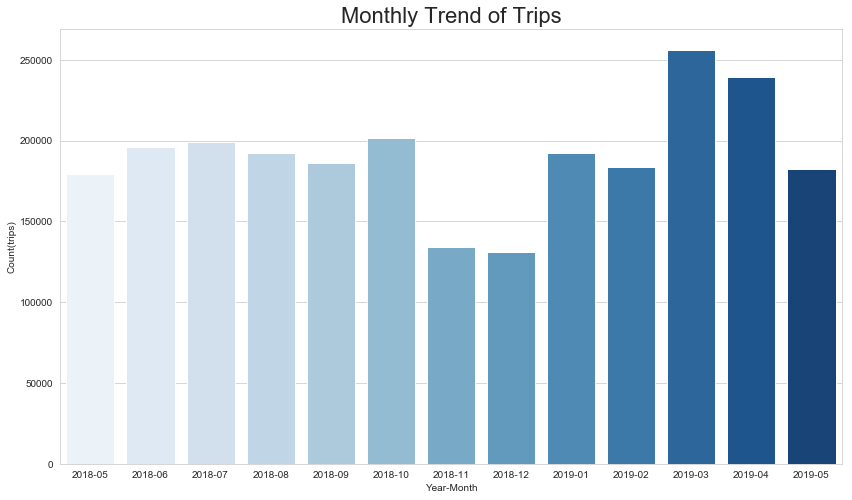

In [27]:
# Plot monthly count of trips.
plt.figure(figsize = (14,8))
sb.countplot(x = 'start_time_year_month', palette = color, 
             data = df.sort_values(by = 'start_time_year_month'))
plt.title('Monthly Trend of Trips', fontsize = 22)
plt.xlabel('Year-Month')
plt.ylabel('Count(trips)')
plt.show()

The plot shows seasonality as November and December have lowest count of trips, March and April have most count of trips. There are fewer trips on winter because of the cold weather. Spring has the peaks on the count of trips because the weather is comfortable for bike riding. 

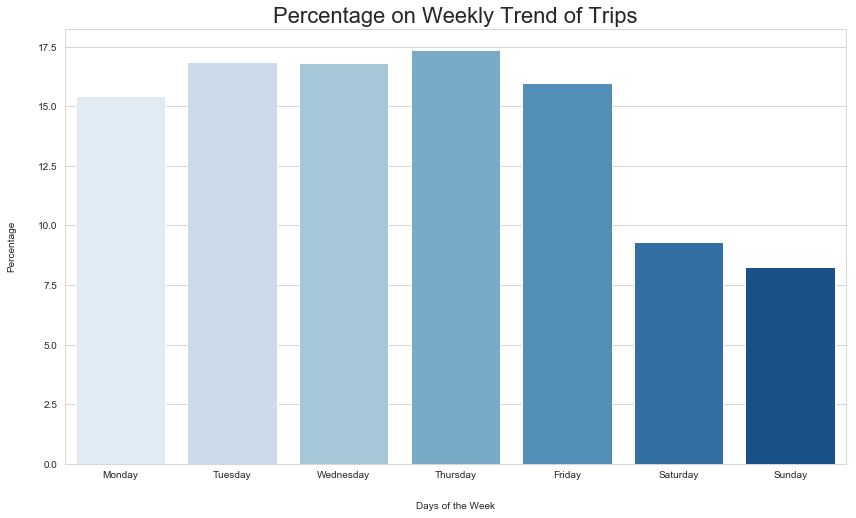

In [28]:
# Plot weekly count of trips.
plt.figure(figsize = (14,8))
trips_week = df.groupby('start_time_day').agg({'bike_id':'count'})
trips_week['percentage'] = (trips_week['bike_id']/trips_week['bike_id'].sum())*100
sb.barplot(x = trips_week.index, y = 'percentage', palette = color, 
             data = trips_week)
plt.title('Percentage on Weekly Trend of Trips', fontsize = 22)
plt.xlabel('Days of the Week', labelpad = 22)
plt.ylabel('Percentage', labelpad = 22)
plt.show()

Percentage on bike rides is the lowest on Saturday and Sunday. Users tend to use the service much more during weekdays (Monday to Friday). Thursday has the highest percentage on count of trips which is close to 17.5%.

In [29]:
# Check hourly distribution of trips between 6:00 and 22:00. 
hourly_trips = df.loc[(df['start_time_hour'] >= 6) & (df['start_time_hour'] <= 22) ]
hourly_trips_count = hourly_trips.groupby('start_time_hour').agg({'bike_id':'count'})
hourly_trips_count['percentage'] = (hourly_trips_count['bike_id']/hourly_trips_count['bike_id'].sum())*100
hourly_trips_count = hourly_trips_count.reset_index()

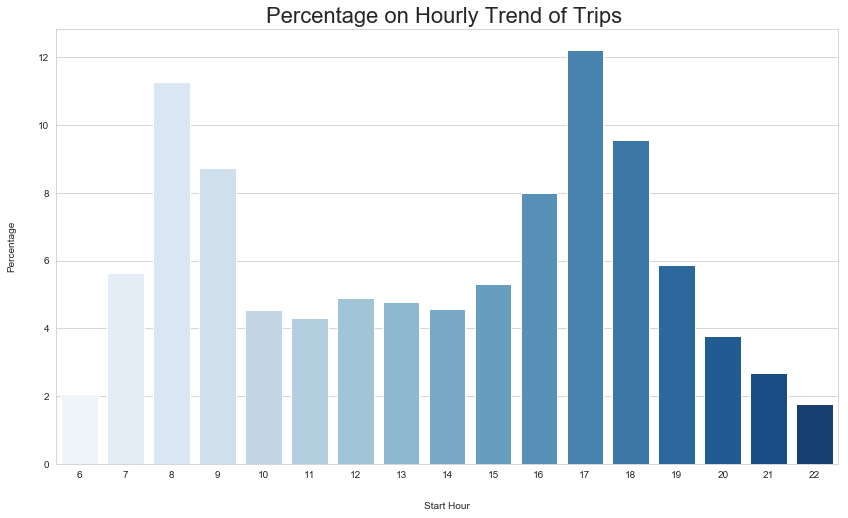

In [30]:
# Plot hourly count of trips.
plt.figure(figsize = (14,8))
sb.barplot(data = hourly_trips_count, x = 'start_time_hour', y = 'percentage', palette = color)
plt.title('Percentage on Hourly Trend of Trips ', fontsize = 22)
plt.xlabel('Start Hour',labelpad = 22)
plt.ylabel('Percentage',labelpad = 22)
plt.show()

The plot shows a bimodal distribution with two nearly equal peaks on 8:00 and 17:00. Next higher points are on 9:00 and 18:00 that are also considered as rush hours. Between 10:00 and 15:00, there is slightly difference on usage. Starting from 16:00, count of trips is increasing sharply to the peak. This shows the service is more frequently used during commuting time of the day.

Next, I'll look into the major user groups.  

In [31]:
# Avoid null values in age.
df['age'] = df['age'].replace(0, np.nan).replace('\.0', '', regex=True)

In [32]:
# Set age bins for an interval of 10.
df['age_bins'] = df['age'].apply(lambda x: '10 - 20' if 10<=x<=20
                                 else '20 - 30' if 20<x<=30
                                 else '30 - 40' if 30<x<=40
                                 else '40 - 50' if 40<x<=50
                                 else '50 - 60' if 50<x<=60
                                 else '60 - 80' if 60<x<=80
                                 else '80+' if 80<x
                                 else x)

In [33]:
age_group_perc = df.groupby('age_bins').agg({'bike_id':'count'})/df.groupby('age_bins').agg({'bike_id':'count'}).sum()
age_group_perc = age_group_perc*100
age_group_perc.rename(columns = {'bike_id':'percentage'},inplace = True)
age_group_perc = age_group_perc.reset_index()

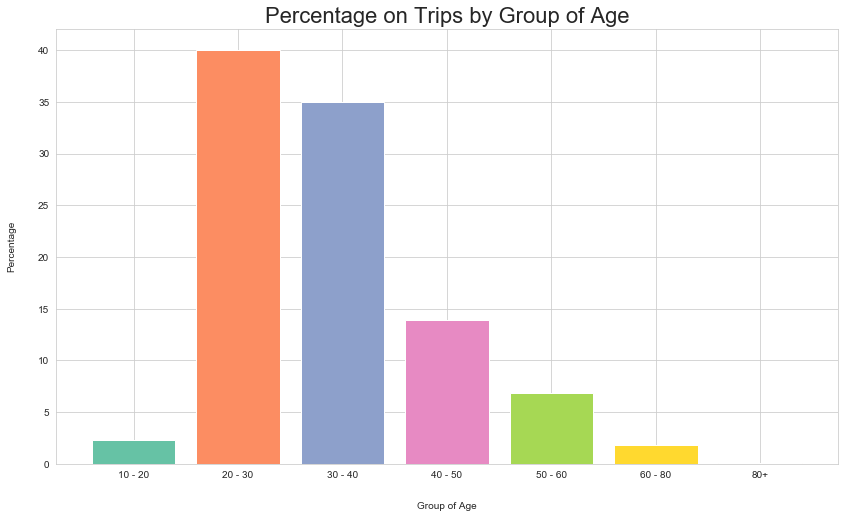

In [34]:
# Plot the percentage on trips by group of age.
plt.figure(figsize = (14,8))
plt.bar(age_group_perc.age_bins, age_group_perc.percentage, color=plt.cm.Set2(np.arange(len(age_group_perc))))
plt.title('Percentage on Trips by Group of Age',fontsize = 22)
plt.xlabel('Group of Age',labelpad = 22)
plt.ylabel('Percentage',labelpad = 22)
plt.show()

The plot shows age of 20-30 uses the service the most frequent, this group takes about 40% of trips. Age of 20-40 takes about 75% of overall trips.

Next I’ll look into two user types: Customer and Subscriber. First I want to check the proportion of each type separately. 

In [35]:
# Compute the proportion of trips count for each group.
customer_proportion = df.query('user_type == "Customer"')['bike_id'].count()/df['bike_id'].count()
subscriber_proportion = df.query('user_type == "Subscriber"')['bike_id'].count()/df['bike_id'].count()

print('Proportion of trips by Customer is {:.4f}'.format(customer_proportion))
print('Proportion of trips by Subscriber is {:.4f}'.format(subscriber_proportion))

Proportion of trips by Customer is 0.1444
Proportion of trips by Subscriber is 0.8556


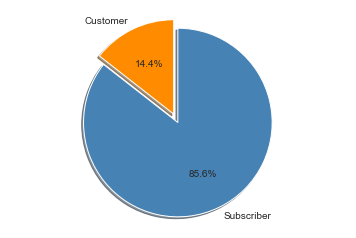

In [36]:
# Create a pie chart.
labels = ['Customer', 'Subscriber']
sizes = [customer_proportion, subscriber_proportion]
colors = ['darkorange', 'steelblue']
explode = (0, 0.1)

plt.pie(sizes, explode=explode, labels=labels, colors = colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')
plt.show()

The main user group for bike renting is Subscriber which takes 85.6% of trips. Customer takes 14.4% of trips.

Next, I want to see the average duration and distance on each group of users.

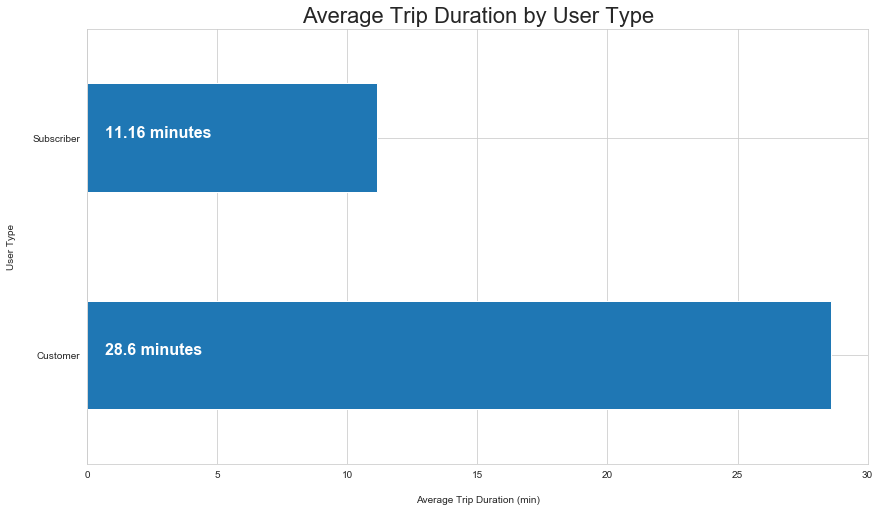

In [37]:
# Plot average trip duration time on each group.
duration_user_type = df.groupby('user_type')['duration'].mean().reset_index()
ax = df.groupby('user_type')['duration'].mean().plot(kind = 'barh', figsize = (14,8))
ax.set_title('Average Trip Duration by User Type', fontsize = 22)
ax.set_xlabel('Average Trip Duration (min)', labelpad = 16)
ax.set_ylabel('User Type', labelpad = 16)


for i,j in enumerate(duration_user_type["duration"]):
    ax.text(.7,i,str(round(j,2))+' minutes', weight='bold', ha='left', fontsize=16, color="white")

plt.show()

Surprisingly, though subscriber group takes 85% of the trips, the average duration is only 11.16 minutes. Comparing to it, average duration of trips for customer group is much higher, which is 28.6 minutes.

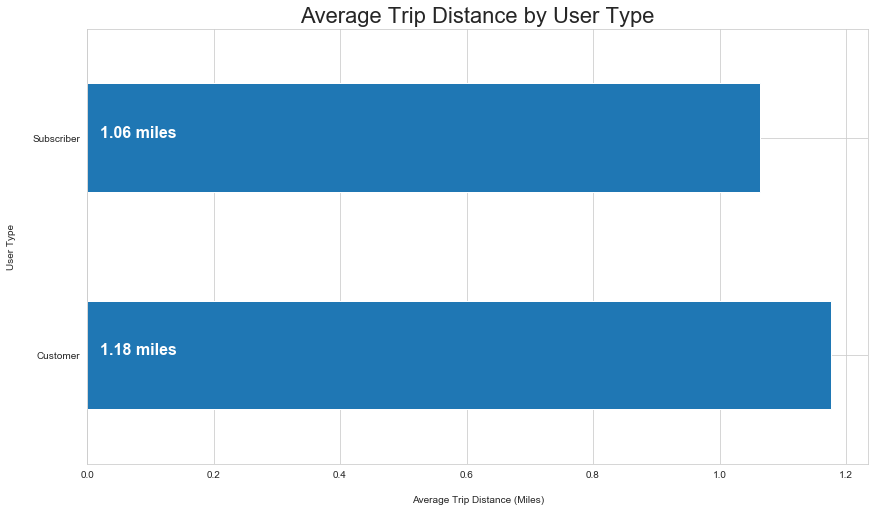

In [38]:
# Plot average trip distance on each group.
distance_user_type = df.groupby('user_type')['distance_miles'].mean().reset_index()

ax = df.groupby('user_type')['distance_miles'].mean().plot(kind = 'barh',figsize = (14,8))
ax.set_title('Average Trip Distance by User Type', fontsize = 22)
ax.set_xlabel('Average Trip Distance (Miles)', labelpad = 16)
ax.set_ylabel('User Type', labelpad = 16)

for i,j in enumerate(distance_user_type['distance_miles']):
    ax.text(0.02,i,str(round(j,2))+' miles', weight='bold', ha='left', fontsize=16, color="white")

plt.show()

Similarly, subscriber group takes relatively shorter distance which is 1.06 miles than Customer, 1.18 miles.

Next, I'll look into the gender group to see the trip distribution.

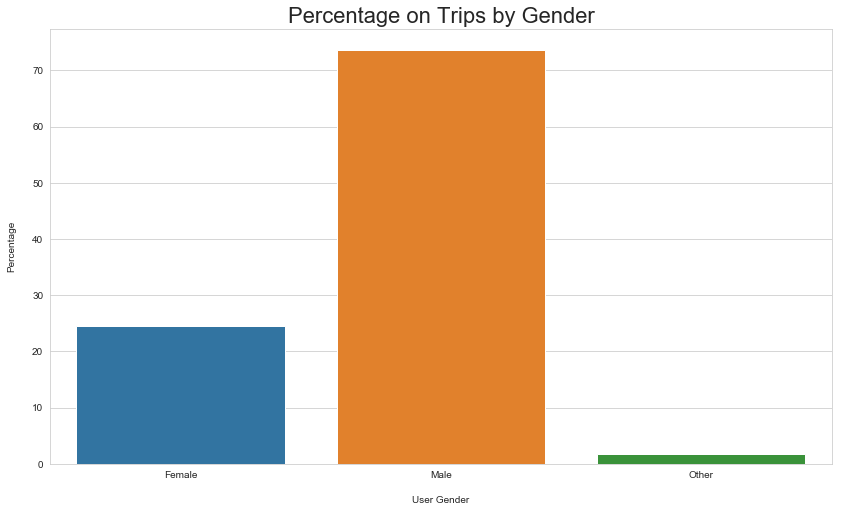

In [39]:
# Plot gender distribution on each group.
gender_trip = df.groupby('member_gender').agg({'bike_id':'count'})
gender_trip['percentage'] = (gender_trip['bike_id']/gender_trip['bike_id'].sum())*100
plt.figure(figsize = (14,8))
ax = sb.barplot(data=gender_trip, x=gender_trip.index,y='percentage')
ax.set_title('Percentage on Trips by Gender', fontsize = 22)
ax.set_xlabel('User Gender', labelpad = 16)
ax.set_ylabel('Percentage', labelpad = 16)
ax.set_xticklabels(ax.get_xticklabels(), rotation='horizontal')
plt.show()

The plot shows male group takes over 70% of trips compare to Female. 

## Question 3. Where does people use the service most frequent?

Next, I'll explore the most frequent stations.

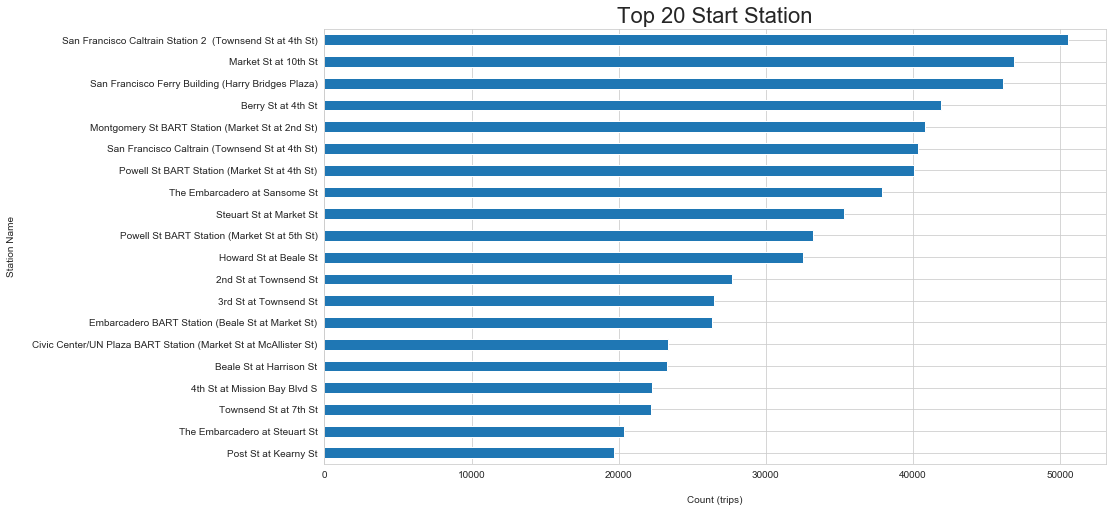

In [40]:
# Plot the top 20 start station name.
ax = df.groupby('start_station_name')['bike_id'].count().sort_values(ascending=True).iloc[-20:].plot(kind = 'barh',figsize = (14,8))
ax.set_title('Top 20 Start Station', fontsize = 22)
ax.set_xlabel('Count (trips)', labelpad = 16)
ax.set_ylabel('Station Name', labelpad = 16)
plt.show()

The most frequently used stations are gathering around downtown bart station and caltrain station, ferry area and also around SOMA area. 

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> In univariate exploration, I mainly explore on trends of trips and major user groups. There are some rare points with age of users. Some data points are over 100-years-old. 

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Average duration and distance of trips tend to be higher on customer group than subscriber group, with the fact that subscriber user is the major user group on bike rides, takes 85% of trips. 
> Since the dataset is large and trip count can be very large, in some of plots I convert the trip count into percentage for neat and better visualizations. 


## Question 4. How does Subscriber and Customer behave differently?

<a id='bi'></a>
### Bivariate Exploration

> In this section, I'll further explore the dataset by measuring with user type categorical variables.

First, I'll start to explore the hourly trip distribution on each group.

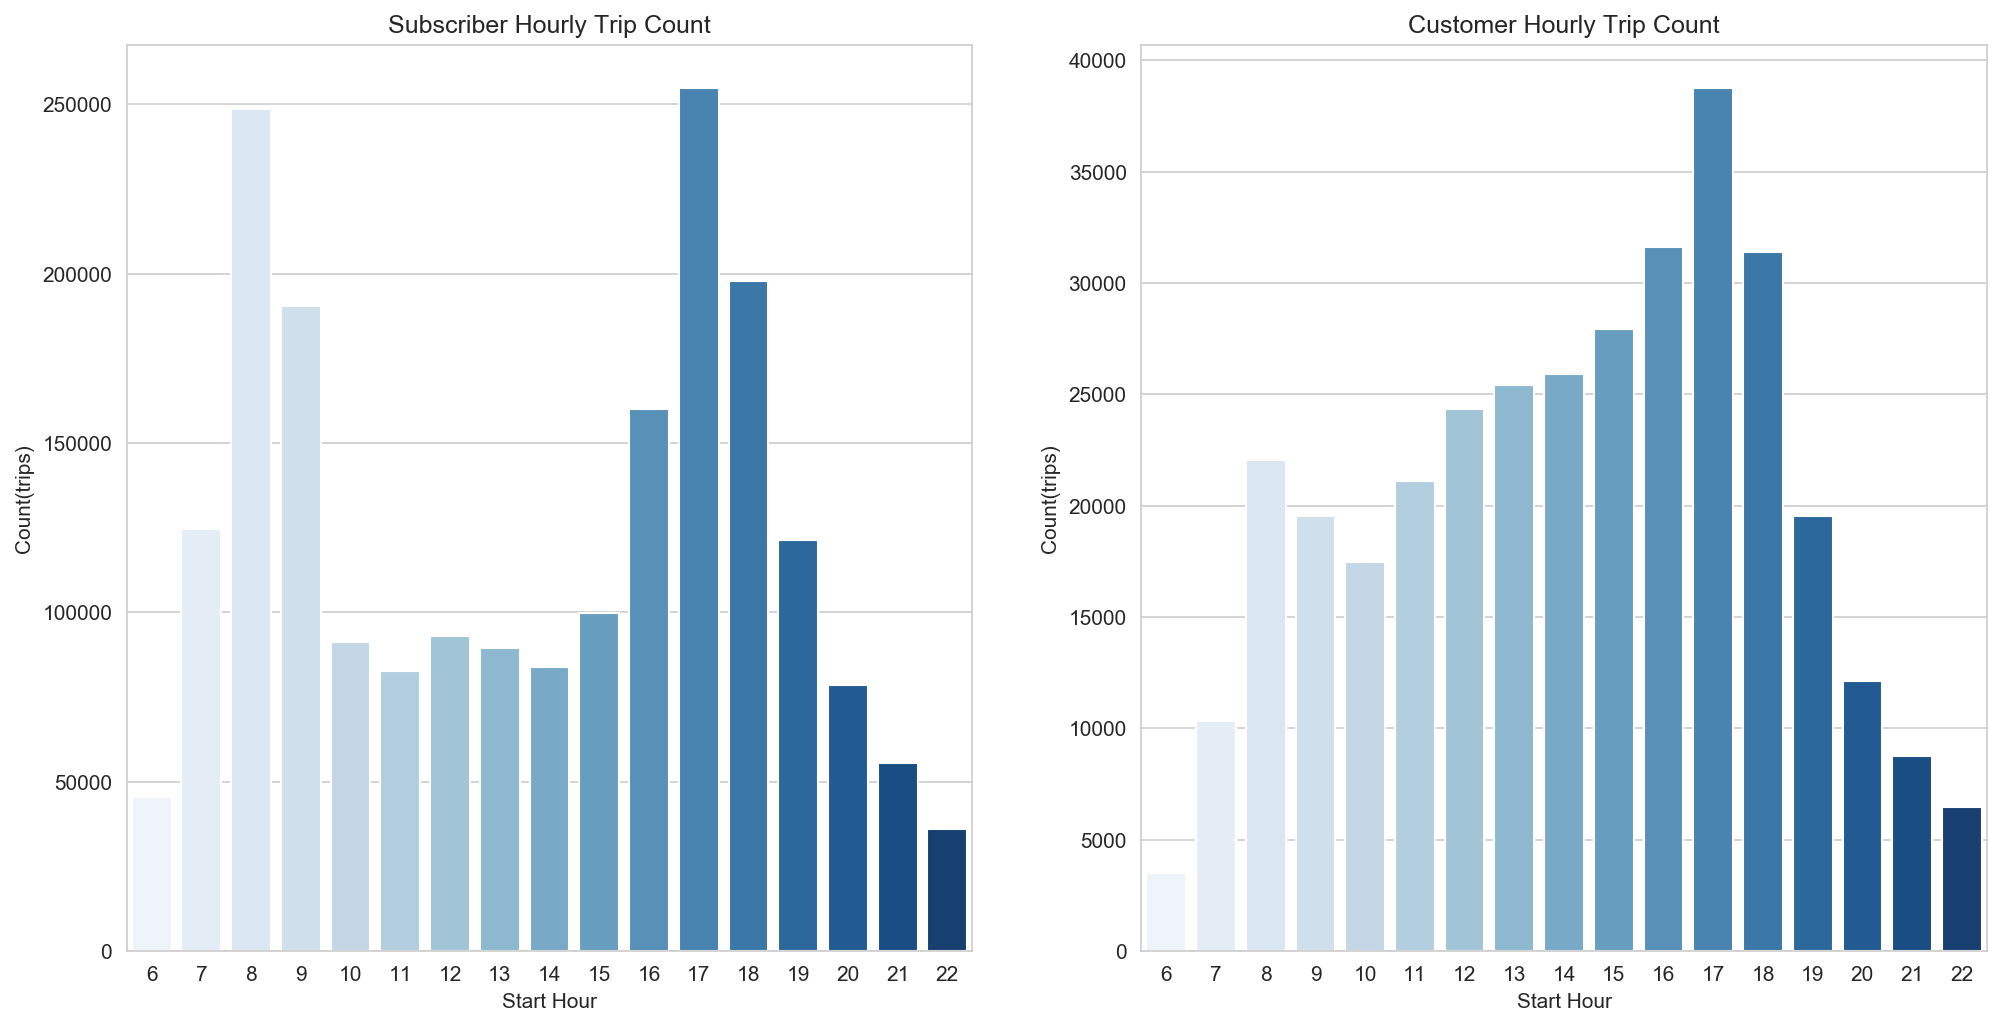

In [41]:
# Plot hourly trips count from 6:00 to 22:00 by Subscriber and Customer.
fig, axes = plt.subplots(figsize = (16,8), nrows = 1, ncols = 2, dpi =150)

plot1 = df[(df.user_type == 'Subscriber') & (df['start_time_hour'] >= 6) & (df['start_time_hour'] <= 22)].groupby('start_time_hour').bike_id.count()
ax1 = sb.barplot(y = plot1, x = plot1.index, ax = axes[0], palette = color).set_title('Subscriber Hourly Trip Count')

plot2 = df[(df.user_type == 'Customer') & (df['start_time_hour'] >= 6) & (df['start_time_hour'] <= 22)].groupby('start_time_hour').bike_id.count()
ax2 = sb.barplot(y = plot2, x = plot2.index, ax = axes[1], palette = color).set_title('Customer Hourly Trip Count')

for ax in axes:
    ax.set_xlabel('Start Hour')
    ax.set_ylabel('Count(trips)')
    
plt.show()

The bimodal peaks on 8:00 and 17:00 are more obvious for subscriber group. This is the group of people taking bike rides for commuting. For customer group, the only peak happens on 17:00.

Next, I want to compare hourly distribution on a day-of-week basis. 

In [42]:
hour_sub = df.loc[(df['start_time_hour'] >= 6) & (df['start_time_hour'] <= 22)]

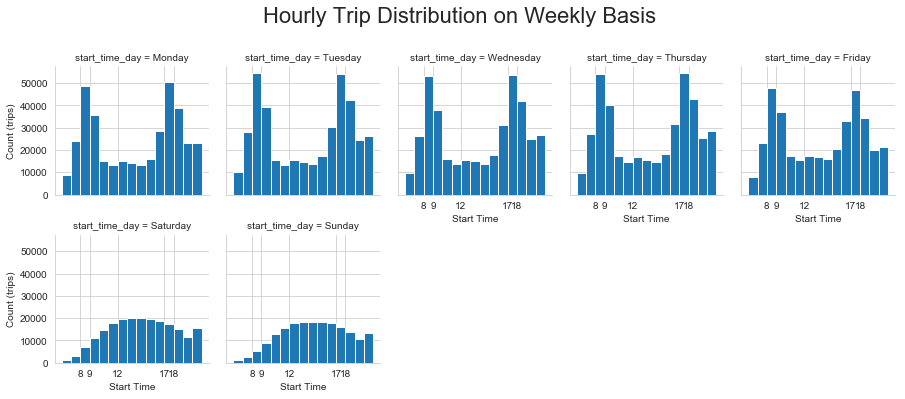

In [43]:
# Plot hourly trip distribution.
g = sb.FacetGrid(data=hour_sub,col = 'start_time_day',col_wrap = 5, height = 2.5)
g.map(plt.hist,'start_time_hour', bins=np.arange(6,22,1)).set(xticks = [8,9,12,17,18])
g.fig.suptitle('Hourly Trip Distribution on Weekly Basis', fontsize = 22, y = 1.1)
g.set_xlabels('Start Time')
g.set_ylabels('Count (trips)')
plt.show()

Overall user behavior on bike renting shows the service is most frequently used during rush hour of weekdays. From Monday to Friday, two nearly equal peaks happen on 8:00 and 17:00. Monday and Friday are slightly lower on trips count compare to Tuesday, Wednesday and Thursday. Weekend hourly distributions tend to be unimodal. The frequent hours centralized between 12:00 and 17:00 with a much lower number in count of trips.

Next, I'll explore this distribution by each user group.

In [44]:
customer_hour_sub = df.loc[(df.user_type == 'Customer') & (df['start_time_hour'] >= 6) & (df['start_time_hour'] <= 22)]

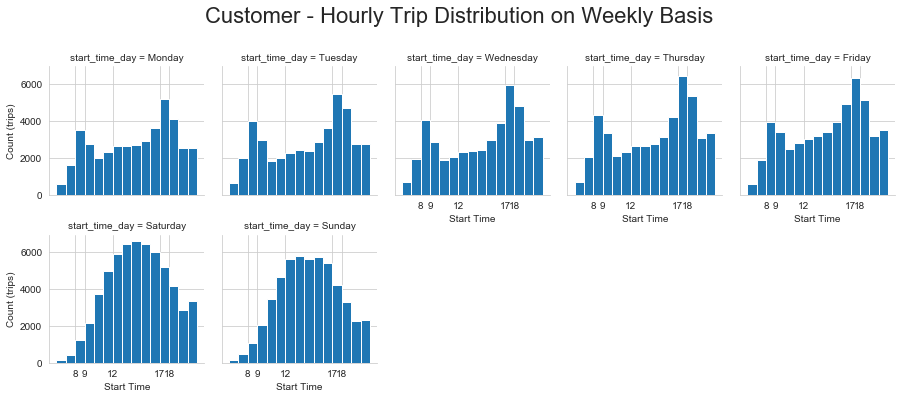

In [45]:
# Plot hourly trip distribution for Customer.
g = sb.FacetGrid(data=customer_hour_sub,col = 'start_time_day',col_wrap = 5, height = 2.5)
g.map(plt.hist,'start_time_hour', bins=np.arange(6,22,1)).set(xticks = [8,9,12,17,18])
g.fig.suptitle('Customer - Hourly Trip Distribution on Weekly Basis', fontsize = 22, y = 1.1)
g.set_xlabels('Start Time')
g.set_ylabels('Count (trips)')
plt.show()

Customer group most frequently takes bike ride at 17:00 on weekdays. A comparably lower peak happens on 8:00 with about half of trips count at 17:00. Weekend distributions tend to be unimodal with frequent rides happen between 12:00 and 17:00. Count of trips in these time frames are as high as the peak on weekdays.

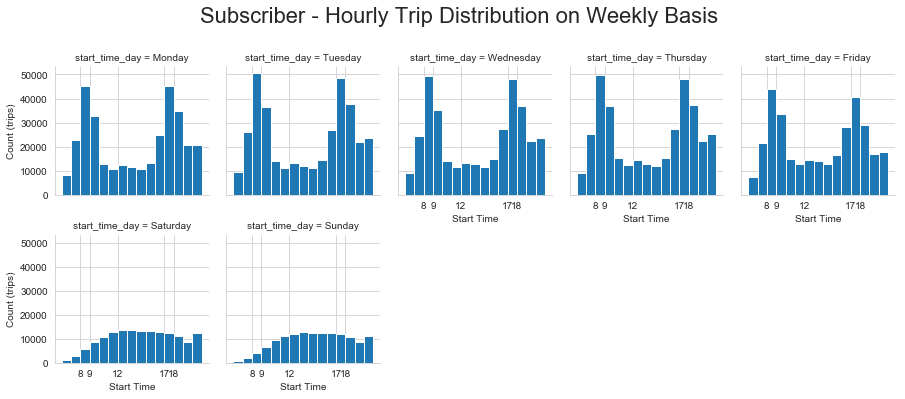

In [46]:
# Plot hourly trip distribution for Subscriber.
subscriber_hour_sub = df.loc[(df.user_type == 'Subscriber') & (df['start_time_hour'] >= 6) & (df['start_time_hour'] <= 22)]
g = sb.FacetGrid(data=subscriber_hour_sub,col = 'start_time_day',col_wrap = 5, height = 2.5)
g.map(plt.hist,'start_time_hour', bins=np.arange(6,22,1)).set(xticks = [8,9,12,17,18])
g.fig.suptitle('Subscriber - Hourly Trip Distribution on Weekly Basis', fontsize = 22, y = 1.1)
g.set_xlabels('Start Time')
g.set_ylabels('Count (trips)')
plt.show()

Different from customer group, two equal peaks happen on 8:00 and 17:00 for subscriber group on weekdays. However the count of trips is obviously decreasing to roughly 1/5 on weekends. No significant peaks on weekend. 

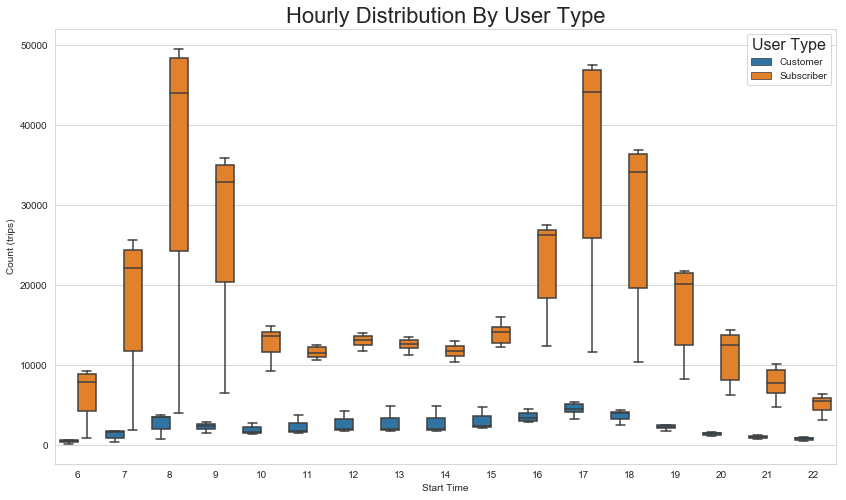

In [47]:
# Create boxplot. 
user_group = df.groupby(['user_type','start_time_day','start_time_hour','member_gender']).bike_id.count().unstack().reset_index()
user_group['count_trip'] = user_group[['Female','Male','Other']].sum(axis=1)
user_group_sub = user_group.loc[(user_group['start_time_hour'] >= 6) & (user_group['start_time_hour'] <= 22)]

fig,axes = plt.subplots(figsize = (14,8),nrows=1,ncols=1)
sb.boxplot(x='start_time_hour', y = 'count_trip', hue = 'user_type',data = user_group_sub)
plt.title('Hourly Distribution By User Type',fontsize = 22)
plt.xlabel('Start Time')
plt.ylabel('Count (trips)')
plt.legend().set_title('User Type', prop = {'size':16})
plt.show()

The boxplot further implies the difference on hourly trend between two user types. Variance is large for subscriber group on 8:00 and 17:00 which match with the big shrink of trips count from weekdays to weekends in the last plot. While, the variance is small for customer group every day during one week. In this plot we could also observe the large gap on trips count between two user groups. 

Next, I'll look into the monthly trend by user types.

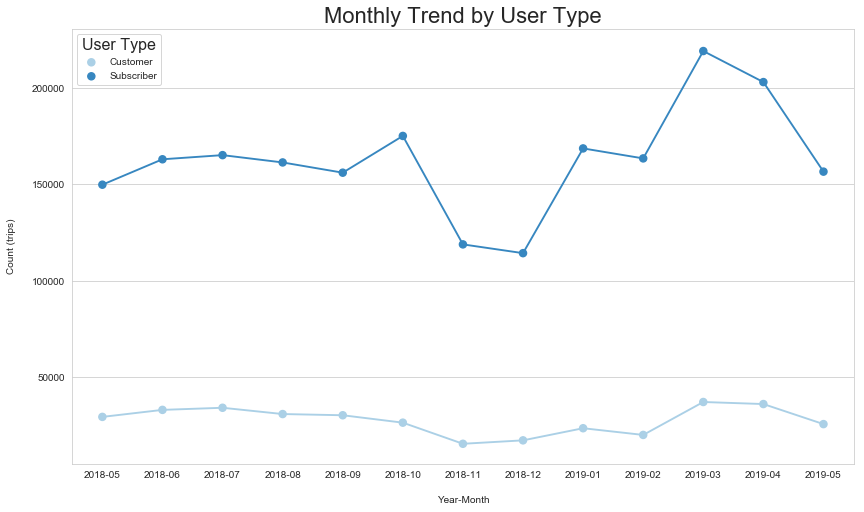

In [48]:
# Plot the monthly trend by user groups.
user_group_monthly_trend = df.groupby(['start_time_year_month','user_type']).size().reset_index()
plt.figure(figsize = (14,8))
ax = sb.pointplot(data = user_group_monthly_trend, x = 'start_time_year_month', y = 0, hue = 'user_type',
                 palette = color, scale = 0.7)
ax.set_title('Monthly Trend by User Type', fontsize = 22)
ax.set_xlabel('Year-Month', labelpad = 16)
ax.set_ylabel('Count (trips)', labelpad = 16)
plt.setp(ax.collections, sizes=[50])
ax.legend().set_title('User Type', prop = {'size':16})
plt.show()

The seasonality behaves significantly on subscribers compare to customers.

In next plots, I'll look into duration and distance distribution by user type.

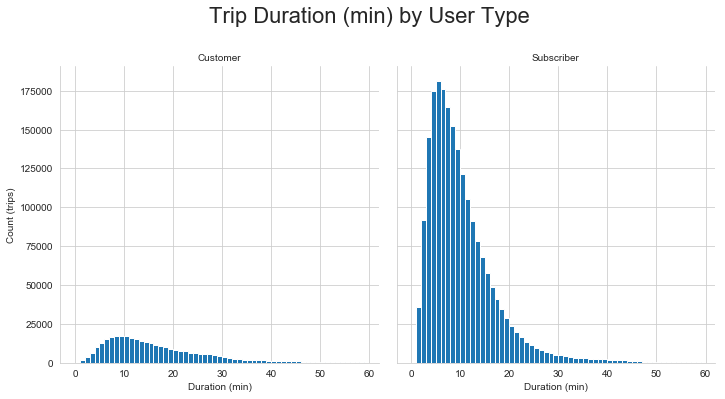

In [49]:
# Plot trip duration with trips less than 50 minutes.
bins= np.arange(0, 60, 1)
g = sb.FacetGrid(df, col = 'user_type', margin_titles = True, height = 5)
g.map(plt.hist,'duration', bins = bins)
g.set_axis_labels('Duration (min)', 'Count (trips)')
g.set_titles(col_template = '{col_name}')
g.fig.suptitle('Trip Duration (min) by User Type',fontsize = 22, y=1.1)
plt.show()

Both plots show right-skewed unimodal distribution. Subscriber group shows a peak on 5 minutes with most trips less than 10 minutes. Then it decreases to half in next 10 minutes interval. The difference on trips count in duration interval is not significant for customer group before 30 minutes. Both of user groups have very few over-30-minutes trips.

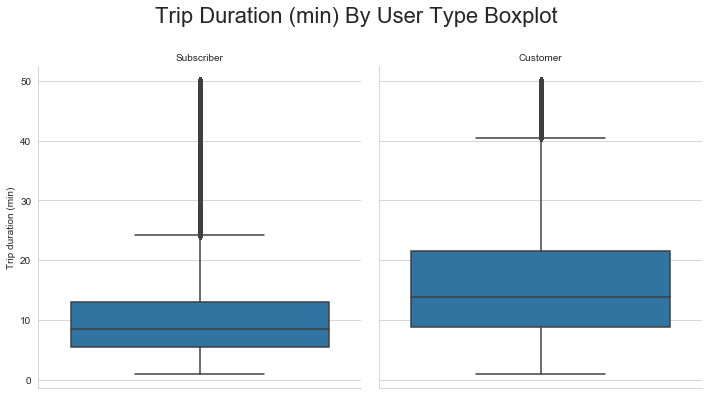

In [50]:
data = df.query('duration < 50')
g = sb.catplot(data=data, y='duration', col="user_type", kind='box')
g.set_titles(col_template = '{col_name}')
g.set_axis_labels("", "Trip duration (min)")
g.fig.suptitle('Trip Duration (min) By User Type Boxplot', y=1.1, fontsize=22)
plt.show()

The boxplot implies the frequent trips interval for two groups. Subscriber group has the frequent duration interval of 5-15 minutes; customer group has the frequent duration interval of 9-22 minutes. Customer group has a larger variance in durations. It seems like subscriber user use the service in a more concentrated time period.

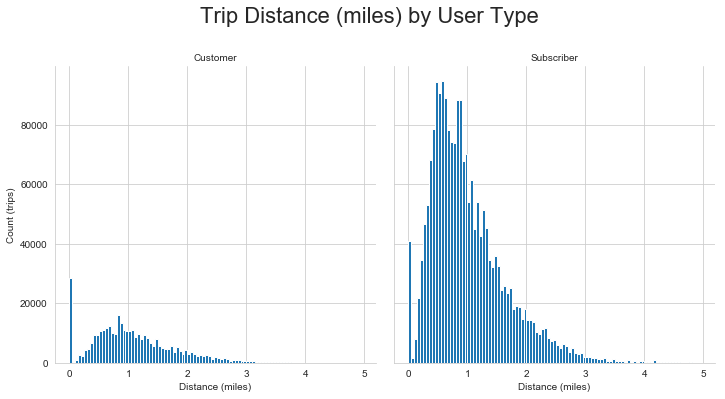

In [51]:
# Plot trip distance with trips less than 5 miles.
bins= np.arange(0, 5, 0.05)
g = sb.FacetGrid(df, col = 'user_type', margin_titles = True, height = 5)
g.map(plt.hist,'distance_miles', bins = bins)
g.set_axis_labels('Distance (miles)', 'Count (trips)')
g.set_titles(col_template = '{col_name}')
g.fig.suptitle('Trip Distance (miles) by User Type',fontsize = 22, y=1.1)
plt.show()

Both plots show right-skewed unimodal distribution. Peak for subscriber group is about 0.6 mile. Peak for customer group is about 0.9 mile. Most of trips for both groups are less than 3 miles.

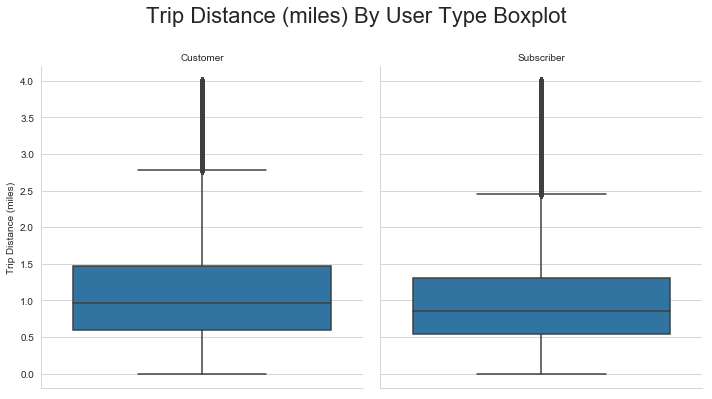

In [52]:
data = df.query('distance_miles < 4')
g = sb.catplot(data=data, y='distance_miles', col="user_type", kind='box')
g.set_titles(col_template = '{col_name}')
g.set_axis_labels("", "Trip Distance (miles)")
g.fig.suptitle('Trip Distance (miles) By User Type Boxplot', y=1.1, fontsize=22)
plt.show()

The boxplot implies the frequent trip distance interval for customers and subscribers are 0.6-1.5 miles and 0.5-1.4 miles separately. The difference is not significant. 

Next, I'll explore the age distribution by user groups.

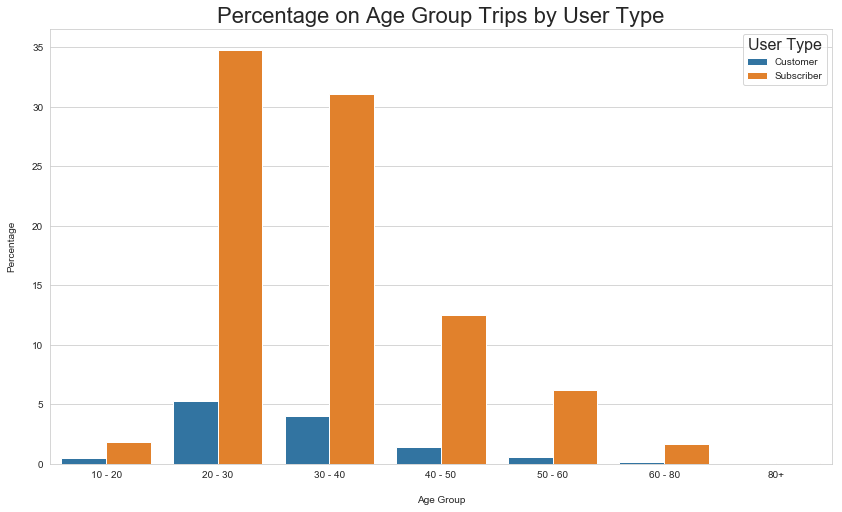

In [53]:
# Plot trip percentage of age group by user type.
user_group_age = df.groupby(['age_bins','user_type']).size().reset_index()
user_group_age['percentage']=user_group_age[0]/user_group_age[0].sum()*100

plt.figure(figsize = (14,8))
ax = sb.barplot(data = user_group_age, x = 'age_bins', y='percentage', hue = 'user_type')
ax.set_title('Percentage on Age Group Trips by User Type', fontsize = 22)
ax.set_xlabel('Age Group', labelpad = 16)
ax.set_ylabel('Percentage', labelpad = 16)
ax.legend().set_title('User Type', prop = {'size':16})
plt.show()

Trend for both groups is similar. 20-30 years old users use the service the most, percentage is successively reduced as the age increasing. 

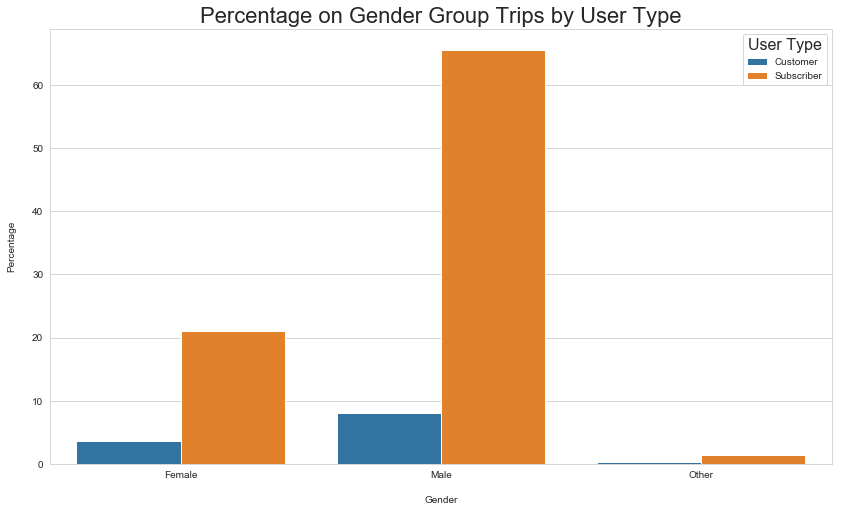

In [54]:
# Plot trip percentage of gender by user type.
user_group_gender = df.groupby(['member_gender','user_type']).size().reset_index()
user_group_gender['percentage']=user_group_gender[0]/user_group_gender[0].sum()*100

plt.figure(figsize = (14,8))
ax = sb.barplot(data = user_group_gender, x = 'member_gender',y='percentage', hue = 'user_type')
ax.set_title('Percentage on Gender Group Trips by User Type', fontsize = 22)
ax.set_xlabel('Gender', labelpad = 16)
ax.set_ylabel('Percentage', labelpad = 16)
ax.legend().set_title('User Type', prop = {'size':16})
plt.show()

Trend for both groups in gender distribution is similar. Male users are the major users in both subscribers and customers compare to female. 

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> In bivariate exploration, the main focus is to find out how does subscriber and customers behave differently. I investigate on time distribution, duration and distance distribution, age distribution and gender distributions to make comparisons and figure out the user behaviors. 

>Subscribers use the service much more than customers which takes a percentage of 85% on trips. Surprisingly, the average duration and distance for subscribers are lower than customers. If we look into the timely distributions, we can see that subscriber frequently rent bikes for commute during rush hours 8am and 5pm. Subscribers less likely to rent bikes on weekends. Customers are likely to take bike rides without preference on weekdays and weekends. Hour preferences for customers are 12:00 - 17:00. The major users are male and age between 20-40. 

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Most users will use the service within 30 minutes without additional charges.  Winter is the most unfavorable season for bike rides and spring is the favorable season, this behavior is more obvious for subscribers, they tend to ride bikes for commute. It seems like customer are not likely be affected by weather and season. 

## Question 5. What is the timely frequency for Subscriber and Customer?

<a id='multi'></a>
### Multivariate Exploration

In [55]:
pd.options.mode.chained_assignment = None 

In [56]:
customer_timely = user_group.loc[(user_group.user_type == 'Customer') & (user_group['start_time_hour'] >= 6) & (user_group['start_time_hour'] <= 22)]
customer_timely['count_perc'] = customer_timely['count_trip'].apply(lambda x: (x/customer_timely['count_trip'].sum())*100)
customer_timely['rank'] = customer_timely['count_perc'].rank(ascending=False).astype(int)
customer_plot = customer_timely.pivot_table(index = 'start_time_hour',columns = 'start_time_day', values = 'rank')

subscriber_timely = user_group.loc[(user_group.user_type == 'Subscriber') & (user_group['start_time_hour'] >= 6) & (user_group['start_time_hour'] <= 22)]
subscriber_timely['count_perc'] = subscriber_timely['count_trip'].apply(lambda x: (x/subscriber_timely['count_trip'].sum())*100)
subscriber_timely['rank'] = subscriber_timely['count_perc'].rank(ascending=False).astype(int)
subscriber_plot = subscriber_timely.pivot_table(index = 'start_time_hour',columns = 'start_time_day', values = 'rank')


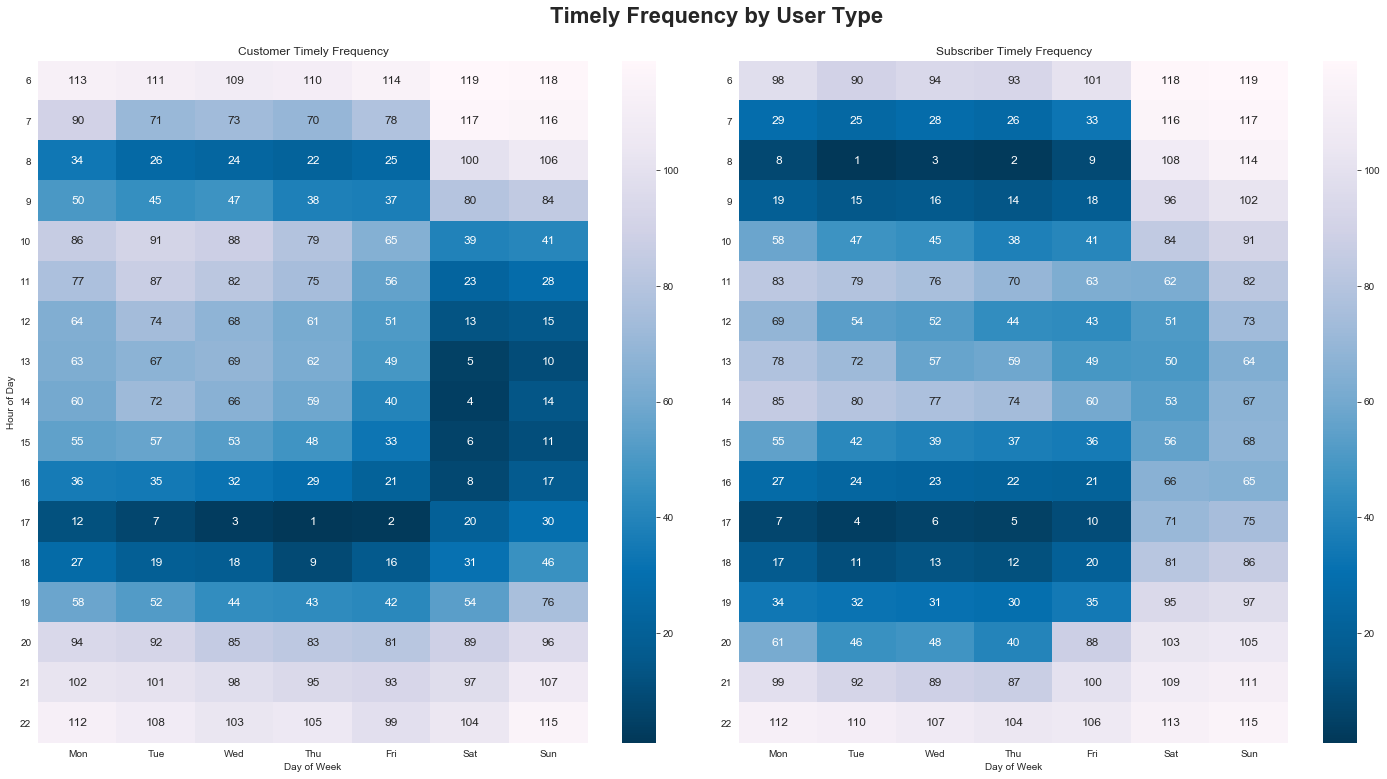

In [57]:
plt.figure(figsize = (20,20))
plt.subplot(221)
plt.suptitle('Timely Frequency by User Type', fontsize = 22, fontweight = 'semibold',y=1.02)
sb.heatmap(customer_plot, fmt='d', annot=True, cmap='PuBu_r', annot_kws={"size": 12})
plt.title('Customer Timely Frequency', y=1.02)
plt.xlabel('Day of Week')
plt.ylabel('Hour of Day')
plt.xticks(np.arange(0.5, 7.5,1), ('Mon', 'Tue', 'Wed', 'Thu', 'Fri','Sat','Sun'))
plt.yticks(rotation = 360)

plt.subplot(222)
sb.heatmap(subscriber_plot, fmt='d', annot=True, cmap='PuBu_r', annot_kws={"size": 12})
plt.title('Subscriber Timely Frequency', y=1.02)
plt.xlabel('Day of Week')
plt.ylabel(' ')
plt.xticks(np.arange(0.5, 7.5,1), ('Mon', 'Tue', 'Wed', 'Thu', 'Fri','Sat','Sun'))
plt.yticks(rotation = 360)
plt.tight_layout()
plt.show()

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?
>The heat map shows the time preferences for two user groups. Darker the color, more frequent the service being used. For customers, they prefer to take bike rides on weekends over weekdays during 10:00 to 18:00. If they rent bikes on weekdays, they prefer to ride around 16:00 or later. Wednesday to Friday is more preferred than Monday and Tuesday for this group.

>For subscribers, they prefer to take bike rides on weekdays over weekends, on 8:00 in the morning and 5pm or later. Lunch time around 12pm is also favored by subscribers. Tuesday to Thursday are most frequently riding days for subscribers, compare to Monday and Friday.

### Were there any interesting or surprising interactions between features?

> 17:00 is the most popular hour to take bike rides. This should be the most comfortable time of the day for a bike riding, for people after work, people want to enjoy some leisure time or people come to tour the city area.

<a id='conclusions'></a>
## Conclusions

### Question 1. How does GoBike grow in last 12 months?
> Numbers of trips can fluctuate sharply within one month. The overall trend tend to be steady in numbers in the past 12 months except there are huge dropdown in December 2018 and January 2019. The recent peak happens on April 2019. Numbers are dropping in May and fluctuate sharply on a weekly basis. 

### Question 2. What are the timely trends? Who are the major user group?
> GoBike service shows a seasonality which is less used in winter and more used in spring. Male users are 73% of whole users. People in 20-40 years old use the service in a 75% percent. 

### Question 3. Where does people use the service most frequent?
>People ride bikes in city area around train stations, ferry stations and SOMA area. SOMA area is home to many of city’s museums, and headquarters of several major software and internet companies. Those locations are convenient for commuting to work, touring for attractions such as museums, ferries, bars and restaurants. 

### Question 4. How do Subscriber and Customer behave differently?
>Subscribers ride bikes for purpose of commuting, in a comparably shorter time and distance. I could imagine a typical subscriber user – male, in 30s, riding the bike from train station to tech companies for work and after work. Occasionally subscribers will ride bikes during lunchtime on weekdays, but less likely on weekends. Customers are more like to be tourists, coming to the city tour the attractions during weekends, or daytime on weekdays. Customers could also include people who like to ride bikes after work, enjoying some after-work leisure time, since 5pm is the peak time. 

### Question 5. What is the timely frequency like for Subscriber and Customers?
>For subscribers who tend to ride bikes for commute, 8am and 5pm are the most favored hours. 8am and 5pm on Tuesday to Thrusday are the most popular hours for subscribers to ride bikes.  It seems like Friday or Monday is a work-from-home day since the bike usage is the least among weekdays for subscribers. Customers like to ride bikes on weekends during day time or around 5pm during weekdays. 5pm on Thursday and Friday, 1-4pm on Saturday are most popular hours for customer to ride the bike.